# A 2D Infinite Fuel Pin Geometry of the SNRE 

## Material Definitions

In [1]:
import os
import numpy as np
from math import pi, sin, cos
import matplotlib.pyplot as plt
%matplotlib inline
import openmc

openmc.Materials.cross_sections = "/home/jimmy/Documents/SNRE_UROP/SNRE/ICL_UROP/dataLibrary/cross_sections.xml"

# Fuel Element Materials definitions
FE_fuel = openmc.Material(name='FE_fuel', temperature=300)
FE_fuel.set_density('g/cm3', 3.64)
FE_fuel.add_nuclide('U235', 3.64*0.153297, 'wo')
FE_fuel.add_nuclide('U238', 3.64*0.011538, 'wo')
FE_fuel.add_nuclide('Zr0', 3.64*0.497253, 'wo')
FE_fuel.add_nuclide('C0', 3.64*0.337912, 'wo')
FE_fuel.add_s_alpha_beta('c_Graphite')

FE_coolant = openmc.Material(name='FE_coolant', temperature=300)
FE_coolant.set_density('atom/b-cm', 1.61317E-03)
FE_coolant.add_nuclide('H1', 1.61317E-03*1.0, 'ao')
FE_coolant.add_s_alpha_beta('c_para_H')

FE_claddingOuter = openmc.Material(name='FE_claddingOuter', temperature=300)
FE_claddingOuter.set_density('g/cm3', 6.73)
FE_claddingOuter.add_nuclide('Zr0', 6.73*0.88375, 'wo')
FE_claddingOuter.add_nuclide('C0', 6.73*0.11625, 'wo')
FE_claddingOuter.add_s_alpha_beta('c_Graphite')

FE_claddingInner = openmc.Material(name='FE_claddingInner', temperature=300)
FE_claddingInner.set_density('g/cm3', 6.73)
FE_claddingInner.add_nuclide('Zr0', 6.73*0.88375, 'wo')
FE_claddingInner.add_nuclide('C0', 6.73*0.11625, 'wo')
FE_claddingInner.add_s_alpha_beta('c_Graphite')

FE_materials = openmc.Materials([FE_fuel, FE_coolant, FE_claddingOuter, FE_claddingInner])
FE_materials.export_to_xml('./xmlFiles/FE_materials.xml')

# Support Element Materials definitions
SE_coolant = openmc.Material(name='SE_coolant', temperature=300)
SE_coolant.set_density('atom/b-cm', 1.61317E-03)
SE_coolant.add_nuclide('H1', 1.61317E-03*1.0, 'ao')
SE_coolant.add_s_alpha_beta('c_para_H')

SE_coolantStagnant = openmc.Material(name='SE_coolantStagnant', temperature=300)
SE_coolantStagnant.set_density('g/cm3', 1.9127E-03)
SE_coolantStagnant.add_nuclide('H1', 1.9127E-03*1.0, 'ao')
SE_coolantStagnant.add_s_alpha_beta('c_para_H')

SE_inconel718 = openmc.Material(name='SE_inconel718', temperature=300)
SE_inconel718.set_density('g/cm3', 8.19)
SE_inconel718.add_nuclide('B10', 8.19*9.21547E-06, 'wo')
SE_inconel718.add_nuclide('B11', 8.19*4.07845E-05, 'wo')
SE_inconel718.add_nuclide('C0', 8.19*7.30000E-04, 'wo')
SE_inconel718.add_nuclide('Al27', 8.19*5.00000E-03, 'wo')
SE_inconel718.add_nuclide('Si28', 8.19*2.92135E-03, 'wo')
SE_inconel718.add_nuclide('Si29', 8.19*1.53709E-04, 'wo')
SE_inconel718.add_nuclide('Si30', 8.19*1.04936E-04, 'wo')
SE_inconel718.add_nuclide('P31', 8.19*1.40000E-04, 'wo')
SE_inconel718.add_nuclide('S32', 8.19*1.32601E-04, 'wo')
SE_inconel718.add_nuclide('S33', 8.19*1.07969E-06, 'wo')
SE_inconel718.add_nuclide('S34', 8.19*6.30314E-06, 'wo')
SE_inconel718.add_nuclide('S36', 8.19*1.57038E-08, 'wo')
SE_inconel718.add_nuclide('Ti46', 8.19*7.12809E-04, 'wo')
SE_inconel718.add_nuclide('Ti47', 8.19*6.56800E-04, 'wo')
SE_inconel718.add_nuclide('Ti48', 8.19*6.64605E-03, 'wo')
SE_inconel718.add_nuclide('Ti49', 8.19*4.97897E-04, 'wo')
SE_inconel718.add_nuclide('Ti50', 8.19*4.86439E-04, 'wo')
SE_inconel718.add_nuclide('Cr50', 8.19*7.93000E-03, 'wo')
SE_inconel718.add_nuclide('Cr52', 8.19*1.59029E-01, 'wo')
SE_inconel718.add_nuclide('Cr53', 8.19*1.83798E-02, 'wo')
SE_inconel718.add_nuclide('Cr54', 8.19*4.66139E-03, 'wo')
SE_inconel718.add_nuclide('Mn55', 8.19*3.18000E-03, 'wo')
SE_inconel718.add_nuclide('Fe54', 8.19*9.59745E-03, 'wo')
SE_inconel718.add_nuclide('Fe56', 8.19*1.56233E-01, 'wo')
SE_inconel718.add_nuclide('Fe57', 8.19*3.67263E-03, 'wo')
SE_inconel718.add_nuclide('Fe58', 8.19*4.97325E-04, 'wo')
SE_inconel718.add_nuclide('Co59', 8.19*9.10000E-03, 'wo')
SE_inconel718.add_nuclide('Ni58', 8.19*3.52788E-01, 'wo')
SE_inconel718.add_nuclide('Ni60', 8.19*1.40574E-01, 'wo')
SE_inconel718.add_nuclide('Ni61', 8.19*6.21264E-03, 'wo')
SE_inconel718.add_nuclide('Ni62', 8.19*2.01328E-02, 'wo')
SE_inconel718.add_nuclide('Ni64', 8.19*5.29279E-03, 'wo')
SE_inconel718.add_nuclide('Cu63', 8.19*1.86948E-03, 'wo')
SE_inconel718.add_nuclide('Cu65', 8.19*8.60518E-04, 'wo')
SE_inconel718.add_nuclide('Nb93', 8.19*5.12500E-02, 'wo')
SE_inconel718.add_nuclide('Mo92', 8.19*4.31558E-03, 'wo')
SE_inconel718.add_nuclide('Mo94', 8.19*2.75551E-03, 'wo')
SE_inconel718.add_nuclide('Mo95', 8.19*4.79735E-03, 'wo')
SE_inconel718.add_nuclide('Mo96', 8.19*5.08565E-03, 'wo')
SE_inconel718.add_nuclide('Mo97', 8.19*2.94523E-03, 'wo')
SE_inconel718.add_nuclide('Mo98', 8.19*7.52928E-03, 'wo')
SE_inconel718.add_nuclide('Mo100', 8.19*3.07139E-03, 'wo')
SE_inconel718.add_s_alpha_beta('c_Graphite')
SE_inconel718.add_s_alpha_beta('c_Al27')
SE_inconel718.add_s_alpha_beta('c_Fe56')

SE_moderator = openmc.Material(name='SE_moderator', temperature=300)
SE_moderator.set_density('g/cm3', 5.61)
SE_moderator.add_nuclide('H1', 5.61*1.7582E-02, 'wo')
SE_moderator.add_nuclide('H2', 5.61*4.0412E-06, 'wo')
SE_moderator.add_nuclide('Zr0', 5.61*9.8241E-01, 'wo')
SE_moderator.add_s_alpha_beta('c_H_in_ZrH')
SE_moderator.add_s_alpha_beta('c_Zr_in_ZrH')

SE_insulator = openmc.Material(name='SE_insulator', temperature=300)
SE_insulator.set_density('g/cm3', 3.365)
SE_insulator.add_nuclide('Zr0', 3.365*0.88375, 'wo')
SE_insulator.add_nuclide('C0', 3.365*0.11625, 'wo')
SE_insulator.add_s_alpha_beta('c_Graphite')

SE_supportSleeve = openmc.Material(name='SE_supportSleeve', temperature=300)
SE_supportSleeve.set_density('g/cm3', 1.70)
SE_supportSleeve.add_nuclide('C0', 1.70*0.999999, 'wo')
SE_supportSleeve.add_nuclide('B10', 1.70*1.84309E-07, 'wo')
SE_supportSleeve.add_nuclide('B11', 1.70*8.15691E-07, 'wo')
SE_supportSleeve.add_s_alpha_beta('c_Graphite')

SE_supportCoating = openmc.Material(name='SE_supportCoating', temperature=300)
SE_supportCoating.set_density('g/cm3', 6.73)
SE_supportCoating.add_nuclide('Zr0', 6.73*0.88375, 'wo')
SE_supportCoating.add_nuclide('C0', 6.73*0.11625, 'wo')
SE_supportCoating.add_s_alpha_beta('c_Graphite')

SE_materials = openmc.Materials([SE_coolant, SE_coolantStagnant, SE_inconel718, SE_moderator, SE_insulator, SE_supportSleeve, SE_supportCoating])
SE_materials.export_to_xml('./xmlFiles/SE_materials.xml')

VE_gasStagnant = openmc.Material(name='VE_gasStagnant', temperature=300)
VE_gasStagnant.set_density('atom/b-cm', 1.61317E-03)
VE_gasStagnant.add_nuclide('H1', 1.61317E-03*1.0, 'ao')
VE_gasStagnant.add_s_alpha_beta('c_para_H')

# Reactor Housing Materials definitions

RH_steelWrapper = openmc.Material(name='RH_steelWrapper', temperature=300)
RH_steelWrapper.set_density('g/cm3', 8.0)
RH_steelWrapper.add_nuclide('C0', 8.0*0.000800, 'wo')
RH_steelWrapper.add_nuclide('Si0', 8.0*0.010000, 'wo')
RH_steelWrapper.add_nuclide('P31', 8.0*0.00045, 'wo')
RH_steelWrapper.add_nuclide('S0', 8.0*0.00030, 'wo')
RH_steelWrapper.add_nuclide('Cr0', 8.0*0.170000, 'wo')
RH_steelWrapper.add_nuclide('Mn55', 8.0*0.020000, 'wo')
RH_steelWrapper.add_element('Fe', 8.0*0.680450, 'wo')
RH_steelWrapper.add_nuclide('Ni0', 8.0*0.110000, 'wo')
RH_steelWrapper.add_nuclide('Nb93', 8.0*0.004000, 'wo')
RH_steelWrapper.add_nuclide('Ta181', 8.0*0.004000, 'wo')
RH_steelWrapper.add_s_alpha_beta('c_Fe56') 
RH_steelWrapper.add_s_alpha_beta('c_Graphite')

RH_berylliumBarrel = openmc.Material(name='RH_berylliumBarrel', temperature=300)
RH_berylliumBarrel.set_density('g/cm3', 1.848)
RH_berylliumBarrel.add_nuclide('Be9', 1.848*1.0, 'wo')
RH_berylliumBarrel.add_s_alpha_beta('c_Be')

RH_berylliumReflector = openmc.Material(name='RH_berylliumReflector', temperature=300)
RH_berylliumReflector.set_density('g/cm3', 1.848)
RH_berylliumReflector.add_nuclide('Be9', 1.848*1.0, 'wo')
RH_berylliumReflector.add_s_alpha_beta('c_Be')

RH_controlDrum = openmc.Material(name='RH_controlDrum', temperature=300)
RH_controlDrum.set_density('g/cm3', 1.848)
RH_controlDrum.add_nuclide('Be9', 1.848*1.0, 'wo')
RH_controlDrum.add_s_alpha_beta('c_Be')

RH_controlPlate = openmc.Material(name='RH_controlPlate', temperature=300)
RH_controlPlate.set_density('g/cm3', 13.3)
RH_controlPlate.add_nuclide('Hf0', 13.3*1.0, 'wo')

RH_lowerTieTubePlenum = openmc.Material(name='RH_lowerTieTubePlenum', temperature=300)
RH_lowerTieTubePlenum.set_density('g/cm3', 0.3908)
RH_lowerTieTubePlenum.add_nuclide('H1', 0.3908*0.002089072, 'wo')
RH_lowerTieTubePlenum.add_nuclide('H2', 0.3908*0.000000480, 'wo')
RH_lowerTieTubePlenum.add_element('Fe', 0.3908*0.997910448, 'wo')
RH_lowerTieTubePlenum.add_s_alpha_beta('c_Fe56')

RH_coreSupportPlate = openmc.Material(name='RH_coreSupportPlate', temperature=300)
RH_coreSupportPlate.set_density('g/cm3', 1.005)
RH_coreSupportPlate.add_nuclide('H1', 1.005*0.002089072, 'wo')
RH_coreSupportPlate.add_nuclide('H2', 1.005*0.000000480, 'wo')
RH_coreSupportPlate.add_element('Fe', 1.005*0.997910448, 'wo')
RH_coreSupportPlate.add_s_alpha_beta('c_Fe56')

RH_upperTieTubePlenum = openmc.Material(name='RH_upperTieTubePlenum', temperature=300)
RH_upperTieTubePlenum.set_density('g/cm3', 0.9718)
RH_upperTieTubePlenum.add_nuclide('H1', 0.9718*0.002160441, 'wo')
RH_upperTieTubePlenum.add_nuclide('H2', 0.9718*0.000000497, 'wo')
RH_upperTieTubePlenum.add_element('Fe', 0.9718*0.997839062, 'wo')
RH_upperTieTubePlenum.add_s_alpha_beta('c_Fe56')

RH_lowerInternalShield = openmc.Material(name='RH_lowerInternalShield', temperature=300)
RH_lowerInternalShield.set_density('g/cm3', 4.4519)
RH_lowerInternalShield.add_nuclide('H1', 4.4519*0.020525838, 'wo')
RH_lowerInternalShield.add_nuclide('H2', 4.4519*0.000004718, 'wo')
RH_lowerInternalShield.add_nuclide('B10', 4.4519*0.000910802, 'wo')
RH_lowerInternalShield.add_nuclide('B11', 4.4519*0.004030909, 'wo')
RH_lowerInternalShield.add_nuclide('Zr0', 4.4519*0.974527730, 'wo')
RH_lowerInternalShield.add_s_alpha_beta('c_H_in_ZrH')
RH_lowerInternalShield.add_s_alpha_beta('c_Zr_in_ZrH')

RH_hydrogenInnerPlenum = openmc.Material(name='RH_hydrogenInnerPlenum', temperature=300)
RH_hydrogenInnerPlenum.set_density('g/cm3', 0.0027)
RH_hydrogenInnerPlenum.add_nuclide('H1', 0.0027*9.99770E-01, 'wo')
RH_hydrogenInnerPlenum.add_nuclide('H2', 0.0027*2.29797E-04, 'wo')
RH_hydrogenInnerPlenum.add_s_alpha_beta('c_para_H')

RH_hydrogenOuterPlenum = openmc.Material(name='RH_hydrogenOuterPlenum', temperature=300)
RH_hydrogenOuterPlenum.set_density('g/cm3', 0.0027)
RH_hydrogenOuterPlenum.add_nuclide('H1', 0.0027*9.99770E-01, 'wo')
RH_hydrogenOuterPlenum.add_nuclide('H2', 0.0027*2.29797E-04, 'wo')
RH_hydrogenOuterPlenum.add_s_alpha_beta('c_para_H')

RH_upperInternalShield = openmc.Material(name='RH_upperInternalShield', temperature=300)
RH_upperInternalShield.set_density('g/cm3', 4.4519)
RH_upperInternalShield.add_nuclide('H1', 4.4519*0.020525838, 'wo')
RH_upperInternalShield.add_nuclide('H2', 4.4519*0.000004718, 'wo')
RH_upperInternalShield.add_nuclide('B10', 4.4519*0.000910802, 'wo')
RH_upperInternalShield.add_nuclide('B11', 4.4519*0.004030909, 'wo')
RH_upperInternalShield.add_nuclide('Zr0', 4.4519*0.974527730, 'wo')
RH_upperInternalShield.add_s_alpha_beta('c_H_in_ZrH')
RH_upperInternalShield.add_s_alpha_beta('c_Zr_in_ZrH')

RH_controlDrumActuatorZone = openmc.Material(name='RH_controlDrumActuatorZone', temperature=300)
RH_controlDrumActuatorZone.set_density('g/cm3', 0.4279)
RH_controlDrumActuatorZone.add_nuclide('H1', 0.4279*0.005140206, 'wo')
RH_controlDrumActuatorZone.add_nuclide('H2', 0.4279*0.000001181, 'wo')
RH_controlDrumActuatorZone.add_element('Fe', 0.4279*0.649684506, 'wo')
RH_controlDrumActuatorZone.add_nuclide('Cu0', 0.4279*0.345174106, 'wo')
RH_controlDrumActuatorZone.add_s_alpha_beta('c_Fe56')

RH_brimShield = openmc.Material(name='RH_brimShield', temperature=300)
RH_brimShield.set_density('g/cm3', 4.4519)
RH_brimShield.add_nuclide('H1', 4.4519*0.020525838, 'wo')
RH_brimShield.add_nuclide('H2', 4.4519*0.000004718, 'wo')
RH_brimShield.add_nuclide('B10', 4.4519*0.000910802, 'wo')
RH_brimShield.add_nuclide('B11', 4.4519*0.004030909, 'wo')
RH_brimShield.add_nuclide('Zr0', 4.4519*0.974527730, 'wo')
RH_brimShield.add_s_alpha_beta('c_H_in_ZrH')
RH_brimShield.add_s_alpha_beta('c_Zr_in_ZrH')

RH_pressureVessel = openmc.Material(name='RH_pressureVessel', temperature=300)
RH_pressureVessel.set_density('g/cm3', 2.70)
RH_pressureVessel.add_nuclide('Al27', 2.70*1.0, 'wo')
RH_pressureVessel.add_s_alpha_beta('c_Al27')

RH_materials = openmc.Materials([RH_steelWrapper, RH_berylliumBarrel, RH_berylliumReflector, RH_controlDrum, RH_controlPlate, RH_lowerTieTubePlenum, RH_coreSupportPlate, RH_upperTieTubePlenum, RH_lowerInternalShield, RH_hydrogenInnerPlenum, RH_hydrogenOuterPlenum, RH_upperInternalShield, RH_controlDrumActuatorZone, RH_brimShield, RH_pressureVessel])
RH_materials.export_to_xml('./xmlFiles/RH_materials.xml')

# Materials .xml
materials = openmc.Materials([FE_fuel,
                              FE_coolant,
                              FE_claddingOuter,
                              FE_claddingInner,
                              SE_coolant,
                              SE_coolantStagnant,
                              SE_inconel718,
                              SE_moderator,
                              SE_insulator,
                              SE_supportSleeve,
                              SE_supportCoating,
                              VE_gasStagnant,
                              RH_steelWrapper,
                              RH_berylliumBarrel,
                              RH_berylliumReflector,
                              RH_controlDrum,
                              RH_controlPlate,
                              RH_lowerTieTubePlenum,
                              RH_coreSupportPlate,
                              RH_upperTieTubePlenum,
                              RH_lowerInternalShield,
                              RH_hydrogenInnerPlenum,
                              RH_hydrogenOuterPlenum,
                              RH_upperInternalShield,
                              RH_controlDrumActuatorZone,
                              RH_brimShield,
                              RH_pressureVessel])
materials.export_to_xml('./xmlFiles/')

## Fuel Element Geometry

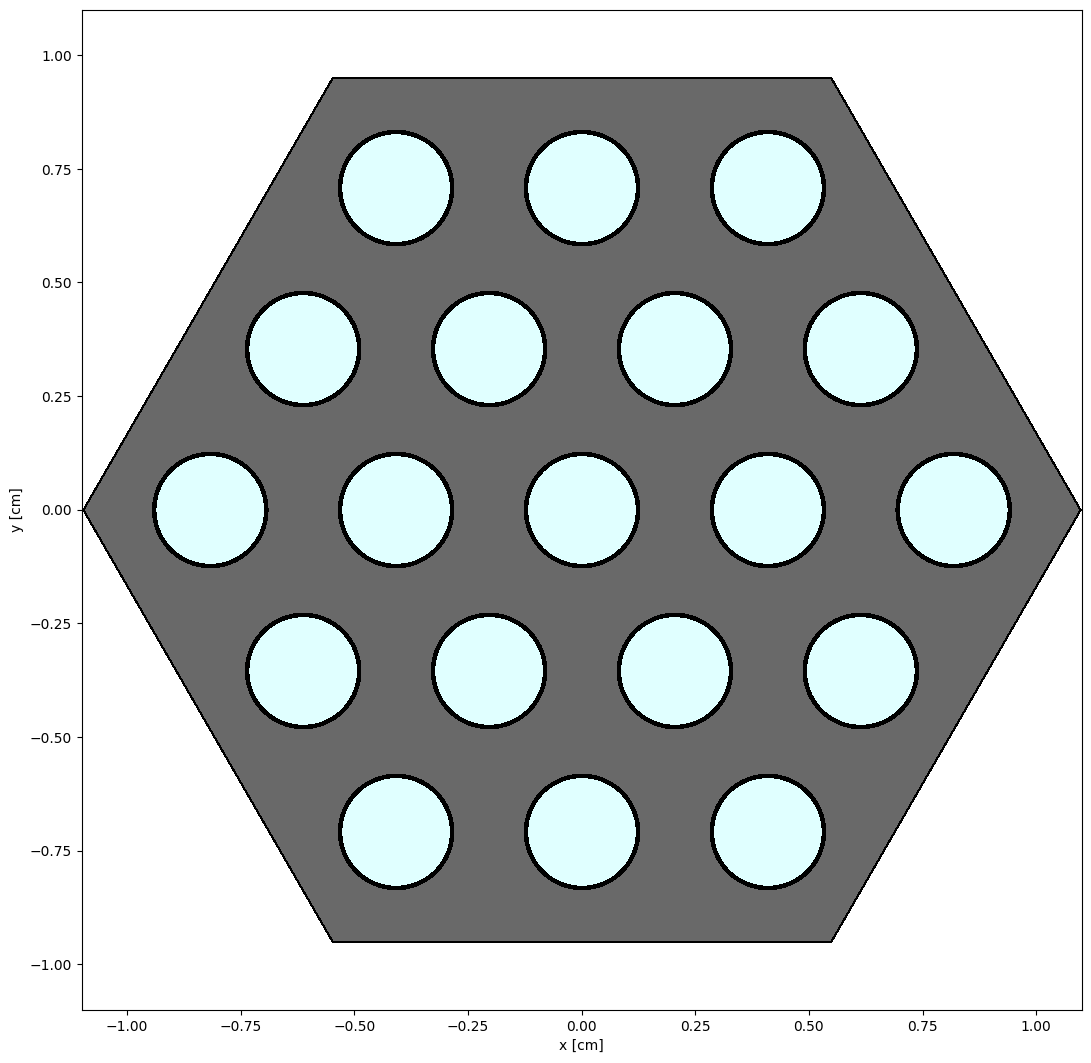

In [2]:
# Geometry definitions
FE_channelRadius = 0.11827
FE_cladOuterRadius = 0.12827
FE_pinPitch = 0.40894
FE_subassemblyDuctOuter = 1.905
FE_subassemblyDuctThickness = 0.005
FE_subassemblyDuctInner = FE_subassemblyDuctOuter - 2*FE_subassemblyDuctThickness

# Boudaries and outer universe
FE_fuelOut = openmc.Cell(cell_id=300, fill=FE_fuel)

# Inner Hexagon
FE_assemblyHex = openmc.hexagonal_prism(edge_length=FE_subassemblyDuctInner / np.sqrt(3.),
                                        orientation='x')

# Outer Hexagon
FE_cladOuterHex = openmc.hexagonal_prism(edge_length=FE_subassemblyDuctOuter / np.sqrt(3.), 
                                         orientation='x')

FE_assemblyCell = openmc.Cell()
FE_cladOuterCell = openmc.Cell()
FE_voidCell = openmc.Cell()

FE_assemblyCell.region = FE_assemblyHex
FE_cladOuterCell.region = ~FE_assemblyHex & FE_cladOuterHex 
FE_voidCell.region = ~FE_cladOuterHex
FE_cladOuterCell.fill = FE_claddingOuter

# Create universes
FE_fuelOutUni = openmc.Universe(cells=(FE_fuelOut,))
FE_cladOuterUni = openmc.Universe(cells=[FE_cladOuterCell])
FE_rootUni = openmc.Universe()

FE_coolantChannelOuter = openmc.ZCylinder(surface_id=301, r=FE_channelRadius)
FE_cladChannelOuter = openmc.ZCylinder(surface_id=302, r=FE_cladOuterRadius)

FE_coolantChannelCell  = openmc.Cell(cell_id=311, fill=FE_coolant, region=-FE_coolantChannelOuter)
FE_cladChannelCell  = openmc.Cell(cell_id=312, fill=FE_claddingInner, region=+FE_coolantChannelOuter & -FE_cladChannelOuter)
FE_fuelChannelCell = openmc.Cell(cell_id=313, fill=FE_fuel, region=+FE_cladChannelOuter)

FE_channelUni = openmc.Universe(cells=[FE_fuelChannelCell, FE_cladChannelCell, FE_coolantChannelCell])

# Creating the hexagonal lattice
FE_lattice=openmc.HexLattice(name='assembly')
FE_lattice.center = (0., 0.)
FE_lattice.pitch = (FE_pinPitch,)
FE_lattice.outer = FE_fuelOutUni
FE_ring2=[FE_channelUni]*12
FE_ring1=[FE_channelUni]*6
FE_ring0=[FE_channelUni]
FE_lattice.universes = [FE_ring2, FE_ring1, FE_ring0]
FE_lattice.orientation='x'
FE_assemblyCell.fill = FE_lattice

FE_rootUni.add_cells([FE_assemblyCell, FE_cladOuterCell, FE_voidCell])
FE_geom=openmc.Geometry(FE_rootUni)
FE_geom.export_to_xml('./xmlFiles/FE_geometry.xml')

# Plotting the fuel pin geometry
FE_rootUni.plot(origin=(0,0,0),
                width=(2.2,2.2),
                color_by='material',
                colors={FE_coolant: 'lightcyan',
                        FE_claddingInner:'black',                     
                        FE_fuel: 'dimgray',
                        FE_claddingOuter: 'black'
                        },
                pixels=[1000,1000])
plt.savefig('./pics/Geometry/fuelElementCrossSection.png', dpi=300)

## Support Element Geometry

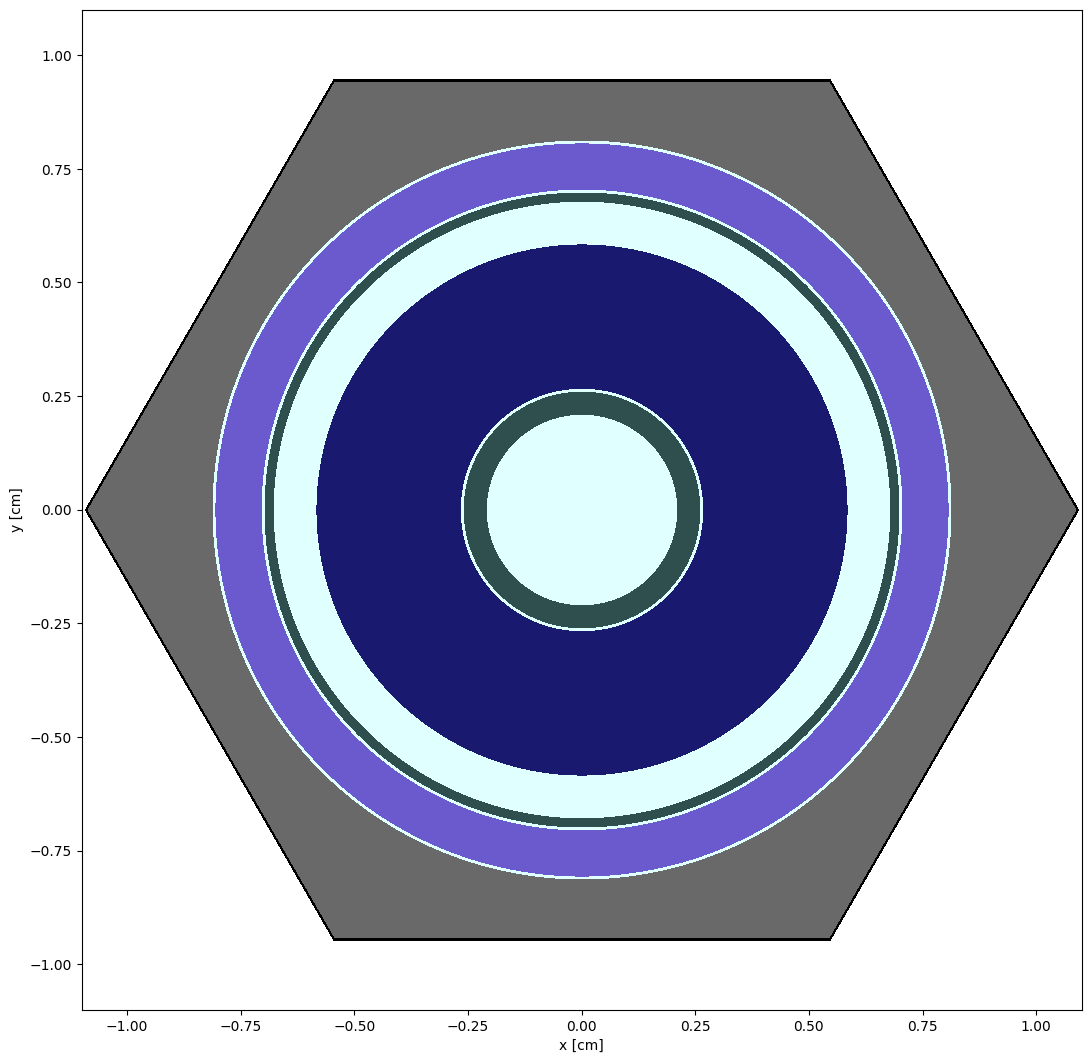

In [3]:
# Geometry definitions
SE_centralChannelRadius = 0.20955
SE_tieTubeInnerRadius = 0.26035
SE_innerHGapRadius = 0.26670
SE_moderatorRadius = 0.58420
SE_outerCoolantChannelRadius = 0.67818
SE_tieTubeOuterRadius = 0.69850
SE_midHGapRadius = 0.70485
SE_insulatorRadius = 0.80645
SE_outerHGapRadius = 0.81280
SE_subassemblyDuctOuter = 1.89484
SE_subassemblyDuctThickness = 0.00508
SE_subassemblyDuctInner = SE_subassemblyDuctOuter - 2*SE_subassemblyDuctThickness

# Inner Hexagon
SE_cladInnerHex = openmc.hexagonal_prism(edge_length=SE_subassemblyDuctInner / np.sqrt(3.),
                                        orientation='x')

# Outer Hexagon
SE_cladOuterHex = openmc.hexagonal_prism(edge_length=SE_subassemblyDuctOuter / np.sqrt(3.), 
                                         orientation='x')

SE_assemblyCell = openmc.Cell()
SE_cladOuterCell = openmc.Cell()
SE_voidCell = openmc.Cell()

SE_assemblyCell.region = SE_cladInnerHex
SE_cladOuterCell.region = ~SE_cladInnerHex & SE_cladOuterHex 
SE_voidCell.region = ~SE_cladOuterHex
SE_cladOuterCell.fill = SE_supportCoating

# Create universes
SE_cladOuterUni = openmc.Universe(cells=[SE_cladOuterCell])
SE_rootUni = openmc.Universe()

SE_centralChannelOuter = openmc.ZCylinder(surface_id=400, r=SE_centralChannelRadius)
SE_tieTubeInnerOuter = openmc.ZCylinder(surface_id=401, r=SE_tieTubeInnerRadius)
SE_innerHGapOuter = openmc.ZCylinder(surface_id=402, r=SE_innerHGapRadius)
SE_moderatorOuter = openmc.ZCylinder(surface_id=403, r=SE_moderatorRadius)
SE_outerCoolantChannelOuter = openmc.ZCylinder(surface_id=404, r=SE_outerCoolantChannelRadius)
SE_tieTubeOuterOuter = openmc.ZCylinder(surface_id=405, r=SE_tieTubeOuterRadius)
SE_midHGapOuter = openmc.ZCylinder(surface_id=406, r=SE_midHGapRadius)
SE_insulatorOuter = openmc.ZCylinder(surface_id=407, r=SE_insulatorRadius)
SE_outerHGapOuter = openmc.ZCylinder(surface_id=408, r=SE_outerHGapRadius)

# Boudaries and outer universe
SE_centralChannelCell = openmc.Cell(cell_id=410, fill=SE_coolant, region=-SE_centralChannelOuter)
SE_tieTubeInnerCell = openmc.Cell(cell_id=411, fill=SE_inconel718, region=+SE_centralChannelOuter & -SE_tieTubeInnerOuter)
SE_innerHGapCell = openmc.Cell(cell_id=412, fill=SE_coolantStagnant, region=+SE_tieTubeInnerOuter & -SE_innerHGapOuter)
SE_moderatorCell = openmc.Cell(cell_id=413, fill=SE_moderator, region=+SE_innerHGapOuter & -SE_moderatorOuter)
SE_outerCoolantChannelCell = openmc.Cell(cell_id=414, fill=SE_coolant, region=+SE_moderatorOuter & -SE_outerCoolantChannelOuter)
SE_tieTubeOuterCell = openmc.Cell(cell_id=415, fill=SE_inconel718, region=+SE_outerCoolantChannelOuter & -SE_tieTubeOuterOuter)
SE_midHGapCell = openmc.Cell(cell_id=416, fill=SE_coolantStagnant, region=+SE_tieTubeOuterOuter & -SE_midHGapOuter)
SE_insulatorCell = openmc.Cell(cell_id=417, fill=SE_insulator, region=+SE_midHGapOuter & -SE_insulatorOuter)
SE_outerHGapCell = openmc.Cell(cell_id=418, fill=SE_coolantStagnant, region=+SE_insulatorOuter & -SE_outerHGapOuter)
SE_sleeveOutCell = openmc.Cell(cell_id=419, fill=SE_supportSleeve, region=+SE_outerHGapOuter)

SE_channelUni = openmc.Universe(cells=[SE_centralChannelCell, SE_tieTubeInnerCell, SE_innerHGapCell, SE_moderatorCell, SE_outerCoolantChannelCell, SE_tieTubeOuterCell, SE_midHGapCell, SE_insulatorCell, SE_outerHGapCell, SE_sleeveOutCell])
SE_assemblyCell.fill = SE_channelUni

SE_rootUni.add_cells([SE_assemblyCell, SE_cladOuterCell, SE_voidCell])
SE_geom=openmc.Geometry(SE_rootUni)
SE_geom.export_to_xml('./xmlFiles/SE_geometry.xml')

# Plotting the fuel pin geometry
SE_rootUni.plot(origin=(0,0,0),
                width=(2.2,2.2),
                color_by='material',
                colors={SE_coolant: 'lightcyan',
                        SE_inconel718: 'darkslategray',
                        SE_coolantStagnant: 'lightcyan',
                        SE_moderator: 'midnightblue',
                        SE_insulator: 'slateblue',
                        SE_supportSleeve: 'dimgray',
                        SE_supportCoating: 'black'
                        },
                pixels=[1000,1000])
plt.savefig('./pics/Geometry/supportElementCrossSection.png', dpi=300)

## Core Assembly Geometry

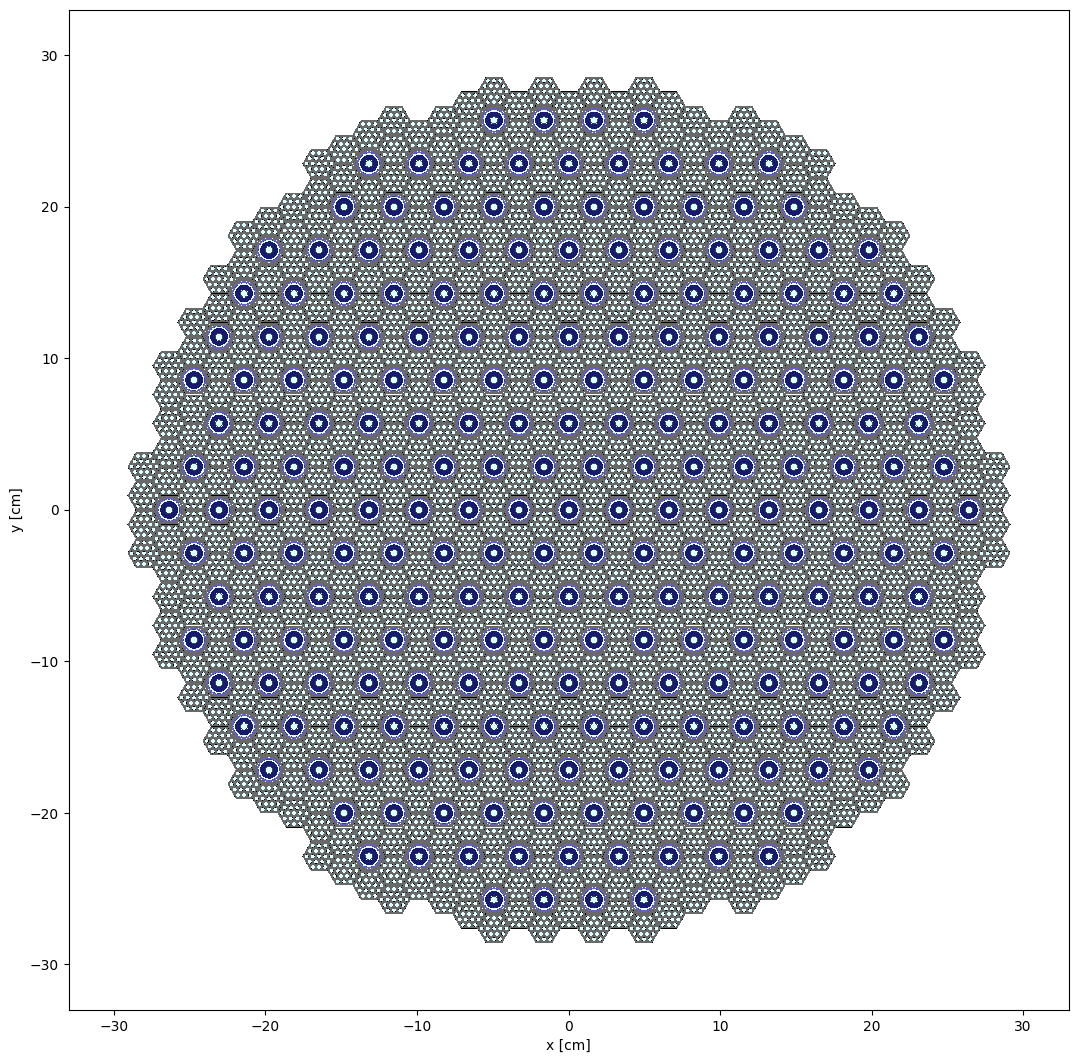

In [4]:
#############################################################################################################
# Void Element Geometry

# Geometry definitions
VE_subassemblyVoidOuter = 1.905

# Void Hexagon
VE_subassemblyVoidHex = openmc.hexagonal_prism(edge_length=VE_subassemblyVoidOuter / np.sqrt(3.), 
                                         orientation='x')

VE_subassemblyVoidCell = openmc.Cell()
VE_subassemblyVoidCell.region = VE_subassemblyVoidHex
VE_subassemblyVoidCell.fill = VE_gasStagnant
VE_rootUni = openmc.Universe(cells=[VE_subassemblyVoidCell])

VE_geom=openmc.Geometry(VE_rootUni)
VE_geom.export_to_xml('./xmlFiles/VE_geometry.xml')

#############################################################################################################

# Geometry definitions
CA_assemblyOuter = 35*1.905

# Outer Hexagon
CA_assemblyHex = openmc.hexagonal_prism(edge_length=CA_assemblyOuter / np.sqrt(3.), 
                                         orientation='x')

CA_assemblyCell = openmc.Cell()
CA_voidCell = openmc.Cell()

CA_assemblyCell.region = CA_assemblyHex
CA_voidCell.region = ~CA_assemblyHex

# Create universes
CA_rootUni = openmc.Universe()

# Creating the hexagonal lattice
CA_lattice=openmc.HexLattice(name='assembly')
CA_lattice.center = (0., 0.)
CA_lattice.pitch = (FE_subassemblyDuctOuter,)
CA_lattice.outer = VE_rootUni
CA_ring17=([VE_rootUni] + ([VE_rootUni] + [VE_rootUni]*2)*2 + [FE_rootUni] + [FE_rootUni]*2+ [FE_rootUni] + ([VE_rootUni] + [VE_rootUni]*2)*2)*6
CA_ring16=([VE_rootUni]*2 + [VE_rootUni] + [FE_rootUni]*2 + [FE_rootUni] + [FE_rootUni]*2 + [SE_rootUni] + [FE_rootUni]*2 + [FE_rootUni] + [FE_rootUni]*2 + [VE_rootUni] + [VE_rootUni]*3 + [VE_rootUni] + [FE_rootUni]*2 + [FE_rootUni] + [FE_rootUni]*2 + [SE_rootUni] + [FE_rootUni]*2 + [FE_rootUni] + [FE_rootUni]*2 + [VE_rootUni] + [VE_rootUni])*3
CA_ring15=([VE_rootUni] + [FE_rootUni]*2 + ([SE_rootUni] + [FE_rootUni]*2)*4)*6
CA_ring14=([FE_rootUni] + ([SE_rootUni] + [FE_rootUni]*2)*4 + [SE_rootUni])*6
CA_ring13=([FE_rootUni]*2 + [SE_rootUni] + [FE_rootUni]*2 + [SE_rootUni] + [FE_rootUni]*2 + [SE_rootUni] + [FE_rootUni]*2 + [SE_rootUni] + [FE_rootUni]*3 + [SE_rootUni] + [FE_rootUni]*2 + [SE_rootUni] + [FE_rootUni]*2 + [SE_rootUni] + [FE_rootUni]*2 + [SE_rootUni] + [FE_rootUni])*3
CA_ring12=([SE_rootUni] + [FE_rootUni]*2 + ([SE_rootUni] + [FE_rootUni]*2)*3)*6
CA_ring11=([FE_rootUni] + ([SE_rootUni] + [FE_rootUni]*2)*3 + [SE_rootUni])*6
CA_ring10=([FE_rootUni]*2 + [SE_rootUni] + [FE_rootUni]*2 + [SE_rootUni] + [FE_rootUni]*2 + [SE_rootUni] + [FE_rootUni]*3 + [SE_rootUni] + [FE_rootUni]*2 + [SE_rootUni] + [FE_rootUni]*2 + [SE_rootUni] + [FE_rootUni])*3
CA_ring9=([SE_rootUni] + [FE_rootUni]*2)*18
CA_ring8=([FE_rootUni] + ([SE_rootUni] + [FE_rootUni]*2)*2 + [SE_rootUni])*6
CA_ring7=([FE_rootUni]*2 + [SE_rootUni] + [FE_rootUni]*2 + [SE_rootUni] + [FE_rootUni]*3 + [SE_rootUni] + [FE_rootUni]*2 + [SE_rootUni] + [FE_rootUni])*3
CA_ring6=([SE_rootUni] + [FE_rootUni]*2)*12
CA_ring5=([FE_rootUni] + [SE_rootUni] + [FE_rootUni]*2 + [SE_rootUni] + [FE_rootUni] + [SE_rootUni] + [FE_rootUni]*2 + [SE_rootUni])*3
CA_ring4=[FE_rootUni]*2 + ([SE_rootUni] + [FE_rootUni]*3)*5 + [SE_rootUni] + [FE_rootUni]
CA_ring3=([SE_rootUni] + [FE_rootUni]*2)*6
CA_ring2=([FE_rootUni] + [SE_rootUni])*6
CA_ring1=[FE_rootUni]*6
CA_ring0=[SE_rootUni]
CA_lattice.universes = [CA_ring17, CA_ring16, CA_ring15, CA_ring14, CA_ring13, CA_ring12, CA_ring11, CA_ring10, CA_ring9, CA_ring8, CA_ring7, CA_ring6, CA_ring5, CA_ring4, CA_ring3, CA_ring2, CA_ring1, CA_ring0]
CA_lattice.orientation='y'
CA_assemblyCell.fill = CA_lattice

CA_rootUni.add_cells([CA_assemblyCell, CA_voidCell])
CA_geom=openmc.Geometry(CA_rootUni)
CA_geom.export_to_xml('./xmlFiles/CA_geometry.xml')

# Plotting the fuel pin geometry
CA_rootUni.plot(origin=(0,0,0),
                width=(30*2.2,30*2.2),
                color_by='material',
                colors={FE_coolant: 'lightcyan',
                        FE_claddingInner:'black',                     
                        FE_fuel: 'dimgray',
                        FE_claddingOuter: 'black',
                        SE_coolant: 'lightcyan',
                        SE_inconel718: 'darkslategray',
                        SE_coolantStagnant: 'lightcyan',
                        SE_moderator: 'midnightblue',
                        SE_insulator: 'slateblue',
                        SE_supportSleeve: 'dimgray',
                        SE_supportCoating: 'black',
                        VE_gasStagnant: 'white'
                        },
                pixels=[1000,1000])
plt.savefig('./pics/Geometry/coreAssemblyCrossSection.png', dpi=300)

## Reactor Housing Geometry

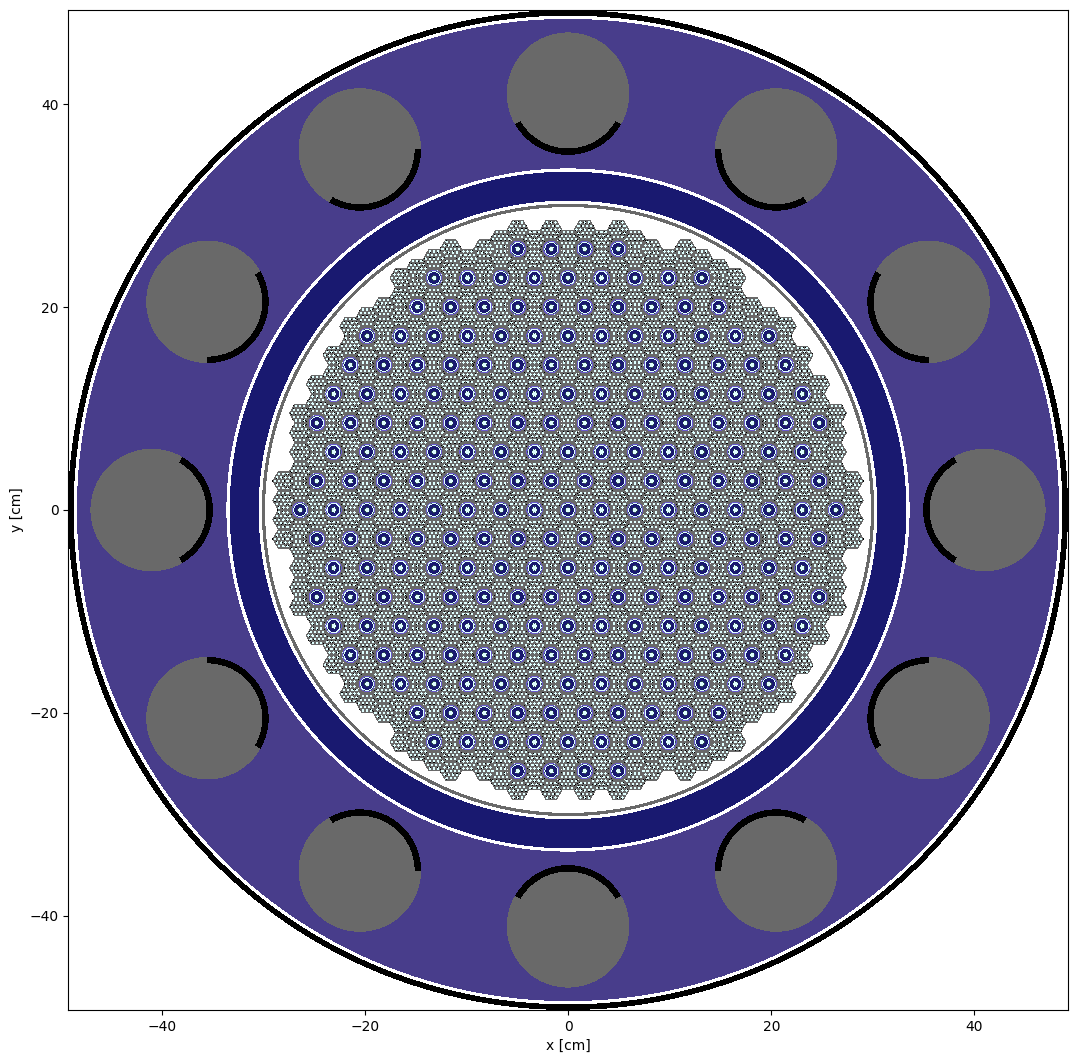

In [5]:
# Geometry Definitions
RH_coreRadius = 29.5275
RH_gapInnerRadius = 29.8450
RH_steelWrapperRadius = 30.1625
RH_gapMid1Radius = 30.4800
RH_berylliumBarrelRadius = 33.3375
RH_gapMid2Radius = 33.6550
RH_berylliumReflectorRadius = 48.3870
RH_gapOuterRadius = 48.7045
RH_pressureVesselRadius = 49.2633

#############################################################################################################
# Control Drum Geometry

CD_controlDrumRadius = 6.0325
CD_controlPlateInnerRadius = 5.3975
CD_controlPlateThickness = 0.635

CD_ringRadii = np.array([(RH_gapMid2Radius + RH_berylliumReflectorRadius)/2])
CD_controlDrumNum = [12]

#############################################################################################################
# Control Drum Angular Position
CD_bundleAngularPos = [0.0] # 0.0 = Fully Subcritical, 90.0 = Critical, 180.0 = Fully Withdrawn
#############################################################################################################

CD_berylliumReflectorOuter = openmc.ZCylinder(r=RH_berylliumReflectorRadius)
CD_berylliumReflectorCell = openmc.Cell(fill=RH_berylliumReflector, region=-CD_berylliumReflectorOuter)

CD_controlDrumPinBundleUniverse = openmc.Universe(cells=[CD_berylliumReflectorCell])

coefficients = np.array([[(-2+np.sqrt(3)), 1, 1, 1]])

for i, (r, n, a) in enumerate(zip(CD_ringRadii, CD_controlDrumNum, CD_bundleAngularPos)):
    for j in range(n):
        theta = (a + j/n*360.0) * pi/180.0
        x = r*cos(theta)
        y = r*sin(theta)

        CD_controlPlateRegion = -openmc.Plane(a=coefficients[0][0], b=coefficients[0][1], c=0, d=0) & -openmc.Plane(a=coefficients[0][2], b=coefficients[0][3], c=0, d=0) & + openmc.ZCylinder(r=CD_controlPlateInnerRadius)
        CD_controlDrumInnerOuter = openmc.ZCylinder(r=CD_controlPlateInnerRadius)
        CD_controlDrumOuterRegion = ~CD_controlPlateRegion
        CD_controlDrumOuterCell = openmc.Cell(fill=RH_controlDrum, region=CD_controlDrumOuterRegion)
        CD_controlDrumInnerCell = openmc.Cell(fill=RH_controlDrum, region=-CD_controlDrumInnerOuter)
        CD_controlPlateCell = openmc.Cell(fill=RH_controlPlate, region=CD_controlPlateRegion)
        CD_controlDrumPinUniverse = openmc.Universe(cells=(CD_controlDrumInnerCell, CD_controlPlateCell, CD_controlDrumOuterCell))

        CD_controlDrumPinOuter = openmc.ZCylinder(x0=x, y0=y, r=CD_controlDrumRadius)
        CD_berylliumReflectorCell.region &= +CD_controlDrumPinOuter

        CD_controlDrumPinCell = openmc.Cell(fill=CD_controlDrumPinUniverse, region=-CD_controlDrumPinOuter)
        CD_controlDrumPinCell.translation = (x, y, 0)
        CD_controlDrumPinCell.rotation = [0.0,0.0,float(30*j)-75]
        CD_controlDrumPinCell.id = (i + 1)*500 + j
        CD_controlDrumPinBundleUniverse.add_cell(CD_controlDrumPinCell)

CD_bundleAssemblyCell = openmc.Cell(fill=CD_controlDrumPinBundleUniverse)

CD_rootUni = openmc.Universe(cells=[CD_bundleAssemblyCell])
CD_geom=openmc.Geometry(CD_rootUni)
CD_geom.export_to_xml('./xmlFiles/CD_geometry.xml')

#############################################################################################################

RH_coreOuter = openmc.ZCylinder(surface_id=600, r=RH_coreRadius)
RH_gapInnerOuter = openmc.ZCylinder(surface_id=601, r=RH_gapInnerRadius)
RH_steelWrapperOuter = openmc.ZCylinder(surface_id=602, r=RH_steelWrapperRadius)
RH_gapMid1Outer = openmc.ZCylinder(surface_id=603, r=RH_gapMid1Radius)
RH_berylliumBarrelOuter = openmc.ZCylinder(surface_id=604, r=RH_berylliumBarrelRadius)
RH_gapMid2Outer = openmc.ZCylinder(surface_id=605, r=RH_gapMid2Radius)
RH_berylliumReflectorOuter = openmc.ZCylinder(surface_id=606, r=RH_berylliumReflectorRadius)
RH_gapOuterOuter = openmc.ZCylinder(surface_id=607, r=RH_gapOuterRadius)
RH_pressureVesselOuter = openmc.ZCylinder(surface_id=608, r=RH_pressureVesselRadius, boundary_type='vacuum')

RH_coreCell = openmc.Cell(cell_id=610, fill=CA_rootUni, region=-RH_coreOuter)
RH_gapInnerCell = openmc.Cell(cell_id=611, fill=VE_gasStagnant, region=+RH_coreOuter & -RH_gapInnerOuter)
RH_steelWrapperCell = openmc.Cell(cell_id=612, fill=RH_steelWrapper, region=+RH_gapInnerOuter & -RH_steelWrapperOuter)
RH_gapMid1Cell = openmc.Cell(cell_id=613, fill=VE_gasStagnant, region=+RH_steelWrapperOuter & -RH_gapMid1Outer)
RH_berylliumBarrelCell = openmc.Cell(cell_id=614, fill=RH_berylliumBarrel, region=+RH_gapMid1Outer & -RH_berylliumBarrelOuter)
RH_gapMid2Cell = openmc.Cell(cell_id=615, fill=VE_gasStagnant, region=+RH_berylliumBarrelOuter & -RH_gapMid2Outer)
RH_berylliumReflectorCell = openmc.Cell(cell_id=616, fill=CD_rootUni, region=+RH_gapMid2Outer & -RH_berylliumReflectorOuter)
RH_gapOuterCell = openmc.Cell(cell_id=617, fill=VE_gasStagnant, region=+RH_berylliumReflectorOuter & -RH_gapOuterOuter)
RH_pressureVesselCell = openmc.Cell(cell_id=618, fill=RH_pressureVessel, region=+RH_gapOuterOuter & -RH_pressureVesselOuter)

RH_rootUni = openmc.Universe()
RH_rootUni.add_cells((RH_coreCell, RH_gapInnerCell, RH_steelWrapperCell, RH_gapMid1Cell, RH_berylliumBarrelCell, RH_gapMid2Cell, RH_berylliumReflectorCell, RH_gapOuterCell, RH_pressureVesselCell))
RH_geom=openmc.Geometry(RH_rootUni)
RH_geom.export_to_xml('./xmlFiles/RH_geometry.xml')

# Plotting the fuel pin geometry
RH_rootUni.plot(origin=(0,0,0),
                width=(RH_pressureVesselRadius*2,RH_pressureVesselRadius*2),
                color_by='material',
                colors={FE_coolant: 'lightcyan',
                        FE_claddingInner:'black',                     
                        FE_fuel: 'dimgray',
                        FE_claddingOuter: 'black',
                        SE_coolant: 'lightcyan',
                        SE_inconel718: 'darkslategray',
                        SE_coolantStagnant: 'lightcyan',
                        SE_moderator: 'midnightblue',
                        SE_insulator: 'slateblue',
                        SE_supportSleeve: 'dimgray',
                        SE_supportCoating: 'black',
                        RH_steelWrapper: 'dimgray',
                        RH_berylliumBarrel: 'midnightblue',
                        RH_berylliumReflector: 'darkslateblue',
                        RH_pressureVessel: 'black',
                        RH_controlPlate: 'black',
                        RH_controlDrum: 'dimgray',
                        VE_gasStagnant: 'white'
                        },
                        pixels=[1000,1000])
plt.savefig('./pics/Geometry/reactorHousingCrossSection.png', dpi=300)

## Reactor Assembly Geometry

In [6]:
# Geometry definitions

###############################################################################

geom=openmc.Geometry(RH_rootUni)
geom.export_to_xml('./xmlFiles/geometry.xml')

## Setting Simulation Parameters

In [7]:
# OpenMC simulation parameters

print(openmc.config)
print(openmc.__version__)

settings = openmc.Settings()
settings.run_mode = 'eigenvalue'

settings.particles = 500
settings.generations_per_batch = 10
settings.batches = 20
settings.inactive = 2
settings.export_to_xml('./xmlFiles/')

source = openmc.IndependentSource()
source.space = openmc.stats.Point(xyz=(0.0, 0.0, 0.0))

mesh = openmc.RegularMesh()
mesh.dimension = [1000, 1000]
mesh.lower_left = [-49.2633, -49.2633]
mesh.upper_right = [49.2633, 49.2633]

tallies = openmc.Tallies()

fuelAllTally = openmc.Tally(tally_id=1)
fuelAllTally.filters = [openmc.MeshFilter(mesh)]
fuelAllTally.scores = ['flux', 'nu-fission', 'absorption', 'elastic', 'total']
tallies.append(fuelAllTally)

fuelThermalTally = openmc.Tally(tally_id=2)
fuelThermalTally.filters = [openmc.MeshFilter(mesh), openmc.EnergyFilter([0,0.1])]
fuelThermalTally.scores = ['flux', 'nu-fission', 'absorption', 'elastic', 'total']
tallies.append(fuelThermalTally)

fuelFastTally = openmc.Tally(tally_id=3)
fuelFastTally.filters = [openmc.MeshFilter(mesh), openmc.EnergyFilter([0.1,1e6])]
fuelFastTally.scores = ['flux', 'nu-fission', 'absorption', 'elastic', 'total']
tallies.append(fuelFastTally)

tallies.export_to_xml('./xmlFiles/')

openmc.run(path_input='./xmlFiles/')

{}
0.13.4-dev


/home/jimmy/.local/lib/python3.10/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=1.
  warn(msg, IDWarning)


                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

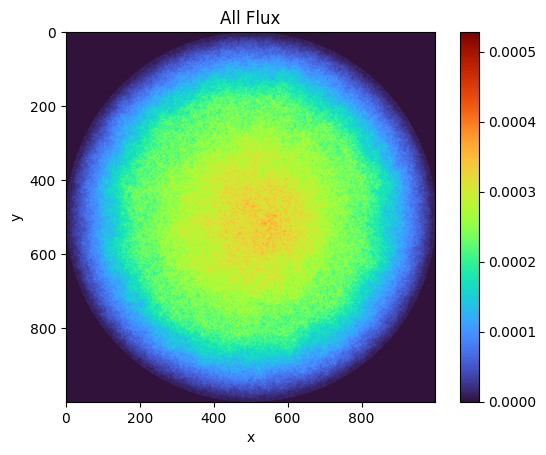

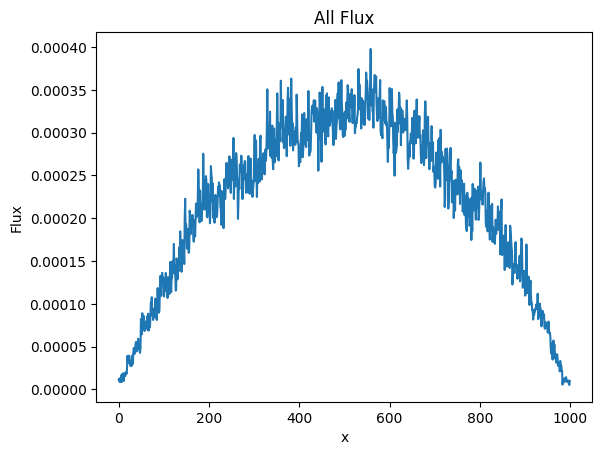

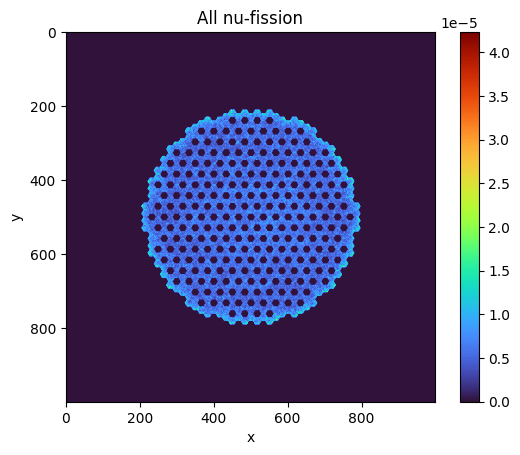

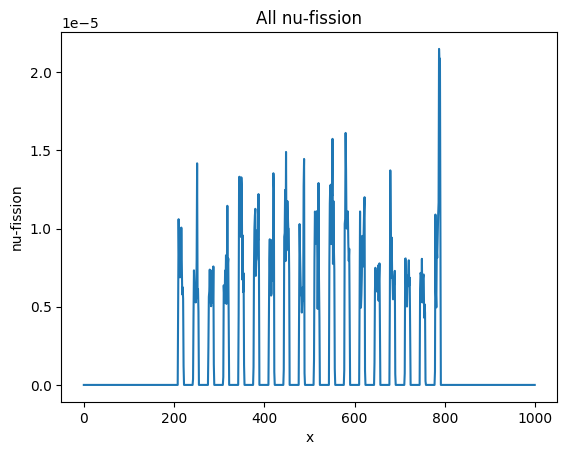

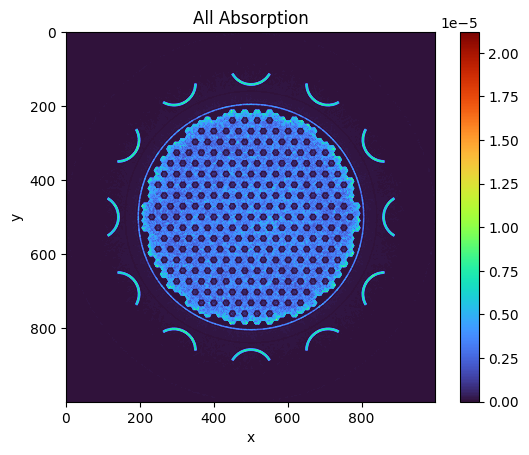

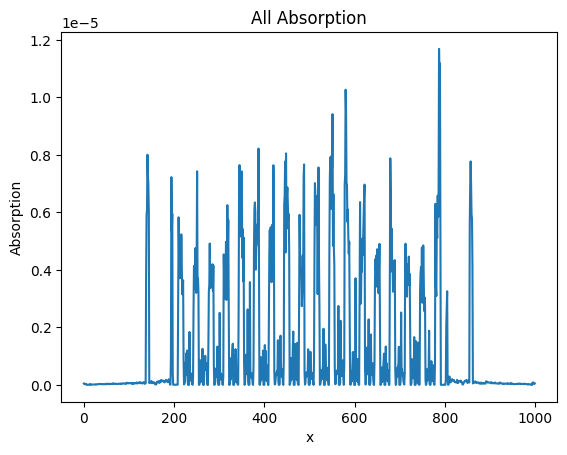

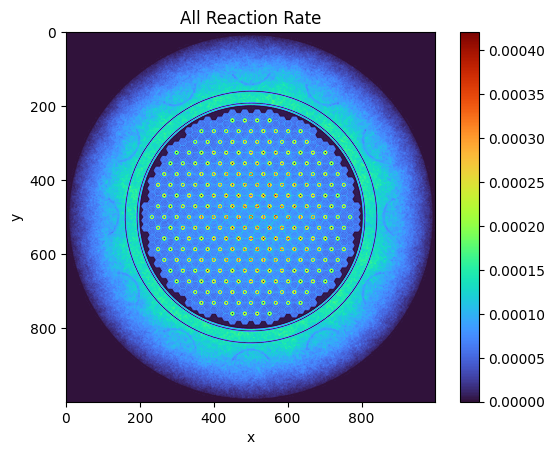

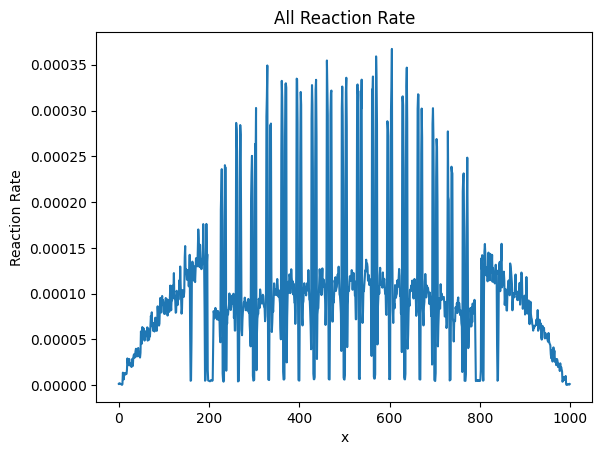

In [8]:
with openmc.StatePoint('statepoint.{}.h5'.format(settings.batches)) as sp:
    outputAllTally = sp.get_tally(id=1)
    dfAll = outputAllTally.get_pandas_dataframe()
    dfAllFlux = dfAll[dfAll['score'] == 'flux']
    dfAllFission = dfAll[dfAll['score'] == 'nu-fission']
    dfAllAbsorption = dfAll[dfAll['score'] == 'absorption']
    #dfAllElastic = dfAll[dfAll['score'] == '(n,elastic)']
    dfAllReactionRate = dfAll[dfAll['score'] == 'total']
    
# print(outputAllTally)
# print(dfAll)
# print(dfAllFlux)
# print(dfAllFlux['mean'])
# print(dfAllFission)
# print(dfAllFission['mean'])
# print(dfAllAbsorption)
# print(dfAllAbsorption['mean'])
# # print(dfAllElastic)
# # print(dfAllElastic['mean'])
# print(dfAllReactionRate)
# print(dfAllReactionRate['mean'])


meanAllFlux = dfAllFlux['mean'].values.reshape((1000,1000))
plt.imshow(meanAllFlux, interpolation='spline16', cmap='turbo')
plt.title('All Flux')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.savefig('./pics/All/AllFlux.png', dpi=300)
#plt.clim(0.0008,0.0012)
plt.show()

meanAllFluxAx = np.column_stack((np.arange(1000), meanAllFlux[500]))
np.savetxt('./dataFiles/meanAllFluxAx.csv', meanAllFluxAx, delimiter=',', fmt='%s')
meanAllFluxAxData, meanAllFluxAxPos = meanAllFluxAx[:,0], meanAllFluxAx[:,1]
plt.plot(meanAllFluxAxData,meanAllFluxAxPos)
plt.title('All Flux')
plt.xlabel('x')
#plt.ylim(bottom=0.0008)
plt.ylabel('Flux')
plt.savefig('./pics/All/AllFluxAx.png', dpi=300)
plt.show()

meanAllFission = dfAllFission['mean'].values.reshape((1000,1000))
plt.imshow(meanAllFission, interpolation='spline16', cmap='turbo')
plt.title('All nu-fission')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
#plt.clim(6e-6,8e-6)
plt.savefig('./pics/All/AllFission.png', dpi=300)
plt.show()

meanAllFissionAx = np.column_stack((np.arange(1000), meanAllFission[500]))
np.savetxt('./dataFiles/meanAllAbsorptionAx.csv', meanAllFissionAx, delimiter=',', fmt='%s')
meanAllFissionAxData, meanAllFissionAxPos = meanAllFissionAx[:,0], meanAllFissionAx[:,1]
plt.plot(meanAllFissionAxData,meanAllFissionAxPos)
plt.title('All nu-fission')
plt.xlabel('x')
#plt.ylim(bottom=0.0008)
plt.ylabel('nu-fission')
plt.savefig('./pics/All/AllFissionAx.png', dpi=300)
plt.show()

meanAllAbsorption = dfAllAbsorption['mean'].values.reshape((1000,1000))
plt.imshow(meanAllAbsorption, interpolation='spline16', cmap='turbo')
plt.title('All Absorption')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
#plt.clim(6e-6,8e-6)
plt.savefig('./pics/All/AllAbsorption.png', dpi=300)
plt.show()

meanAllAbsorptionAx = np.column_stack((np.arange(1000), meanAllAbsorption[500]))
np.savetxt('./dataFiles/meanAllAbsorptionAx.csv', meanAllAbsorptionAx, delimiter=',', fmt='%s')
meanAllAbsorptionAxData, meanAllAbsorptionAxPos = meanAllAbsorptionAx[:,0], meanAllAbsorptionAx[:,1]
plt.plot(meanAllAbsorptionAxData,meanAllAbsorptionAxPos)
plt.title('All Absorption')
plt.xlabel('x')
#plt.ylim(bottom=0.0008)
plt.ylabel('Absorption')
plt.savefig('./pics/All/AllAbsorptionAx.png', dpi=300)
plt.show()

# meanAllElastic = dfAllElastic['mean'].values.reshape((1000,1000))
# plt.imshow(meanAllElastic, interpolation='spline16', cmap='turbo')
# plt.title('All Elastic Scattering')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.colorbar()
# #plt.clim(6e-6,8e-6)
# plt.savefig('./pics/All/AllElastic.png', dpi=300)
# plt.show()

meanAllReactionRate = dfAllReactionRate['mean'].values.reshape((1000,1000))
plt.imshow(meanAllReactionRate, interpolation='spline16', cmap='turbo')
plt.title('All Reaction Rate')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
#plt.clim(6e-6,8e-6)
plt.savefig('./pics/All/AllReactionRate.png', dpi=300)
plt.show()

meanAllReactionRateAx = np.column_stack((np.arange(1000), meanAllReactionRate[500]))
np.savetxt('./dataFiles/meanAllReactionRateAx.csv', meanAllReactionRateAx, delimiter=',', fmt='%s')
meanAllReactionRateAxData, meanAllReactionRateAxPos = meanAllReactionRateAx[:,0], meanAllReactionRateAx[:,1]
plt.plot(meanAllReactionRateAxData,meanAllReactionRateAxPos)
plt.title('All Reaction Rate')
plt.xlabel('x')
#plt.ylim(bottom=0.0008)
plt.ylabel('Reaction Rate')
plt.savefig('./pics/All/AllReactionRateAx.png', dpi=300)
plt.show()

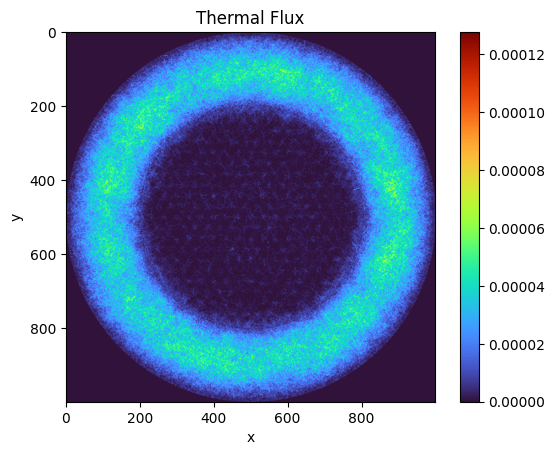

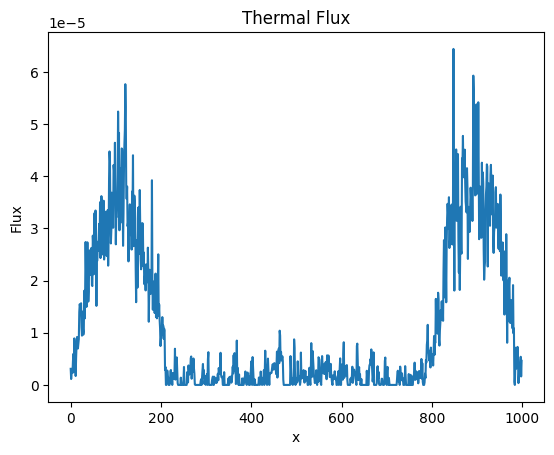

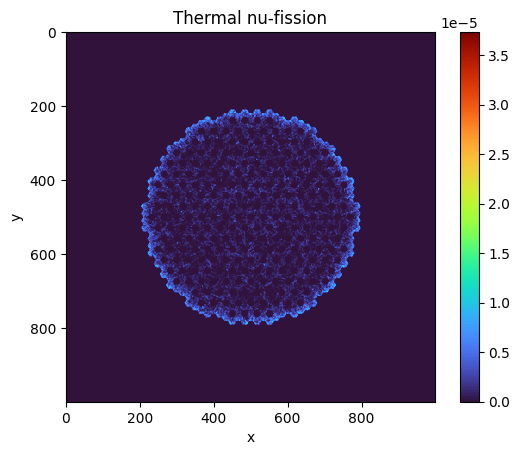

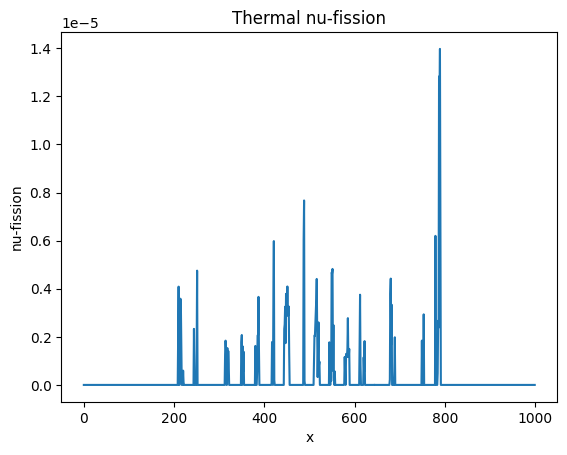

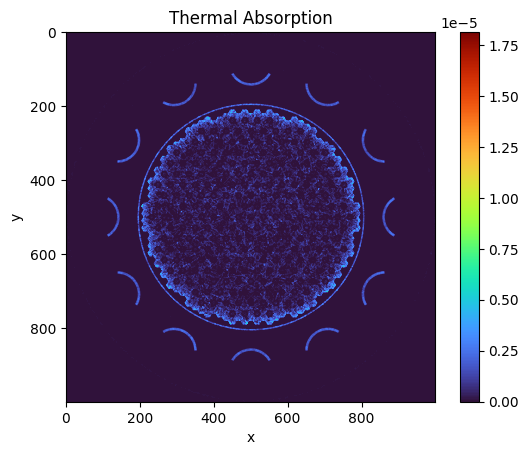

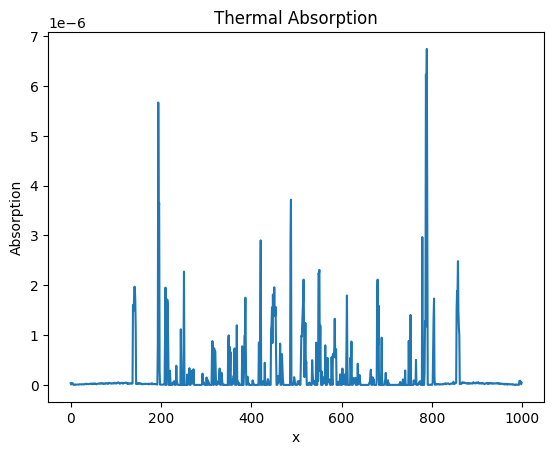

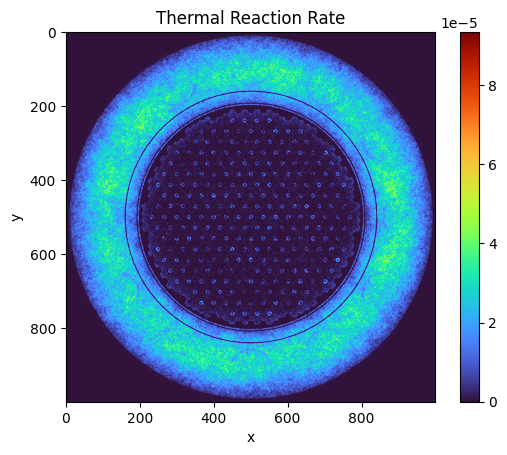

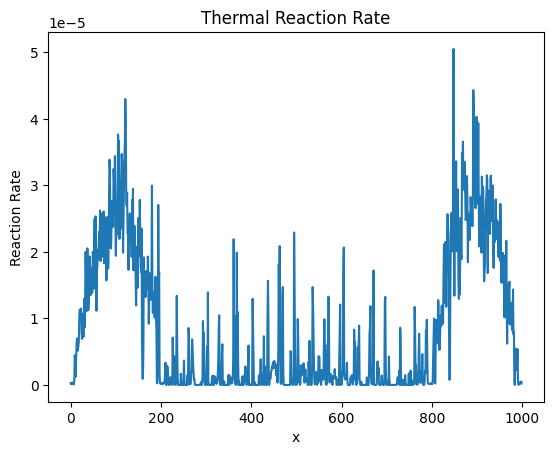

In [9]:
with openmc.StatePoint('statepoint.{}.h5'.format(settings.batches)) as sp:
    outputThermalTally = sp.get_tally(id=2)
    dfThermal = outputThermalTally.get_pandas_dataframe()
    dfThermalFlux = dfThermal[dfThermal['score'] == 'flux']
    dfThermalFission = dfThermal[dfThermal['score'] == 'nu-fission']
    dfThermalAbsorption = dfThermal[dfThermal['score'] == 'absorption']
    # dfThermalElastic = dfThermal[dfThermal['score'] == '(n,elastic)']
    dfThermalReactionRate = dfThermal[dfThermal['score'] == 'total']

# print(outputThermalTally)
# print(dfThermal)
# print(dfThermalFlux)
# print(dfThermalFission)
# print(dfThermalFlux['mean'])

meanThermalFlux = dfThermalFlux['mean'].values.reshape((1000,1000))
plt.imshow(meanThermalFlux, interpolation='spline16', cmap='turbo')
plt.title('Thermal Flux')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.savefig('./pics/Thermal/ThermalFlux.png', dpi=300)
#plt.clim(0.0008,0.0012)
plt.show()

meanThermalFluxAx = np.column_stack((np.arange(1000), meanThermalFlux[500]))
np.savetxt('./dataFiles/meanThermalFluxAx.csv', meanThermalFluxAx, delimiter=',', fmt='%s')
meanThermalFluxAxData, meanThermalFluxAxPos = meanThermalFluxAx[:,0], meanThermalFluxAx[:,1]
plt.plot(meanThermalFluxAxData,meanThermalFluxAxPos)
plt.title('Thermal Flux')
plt.xlabel('x')
#plt.ylim(bottom=0.0008)
plt.ylabel('Flux')
plt.savefig('./pics/Thermal/ThermalFluxAx.png', dpi=300)
plt.show()

meanThermalFission = dfThermalFission['mean'].values.reshape((1000,1000))
plt.imshow(meanThermalFission, interpolation='spline16', cmap='turbo')
plt.title('Thermal nu-fission')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
#plt.clim(6e-6,8e-6)
plt.savefig('./pics/Thermal/ThermalFission.png', dpi=300)
plt.show()

meanThermalFissionAx = np.column_stack((np.arange(1000), meanThermalFission[500]))
np.savetxt('./dataFiles/meanThermalFissionAx.csv', meanThermalFissionAx, delimiter=',', fmt='%s')
meanThermalFissionAxData, meanThermalFissionAxPos = meanThermalFissionAx[:,0], meanThermalFissionAx[:,1]
plt.plot(meanThermalFissionAxData,meanThermalFissionAxPos)
plt.title('Thermal nu-fission')
plt.xlabel('x')
#plt.ylim(bottom=0.0008)
plt.ylabel('nu-fission')
plt.savefig('./pics/Thermal/ThermalFissionAx.png', dpi=300)
plt.show()

meanThermalAbsorption = dfThermalAbsorption['mean'].values.reshape((1000,1000))
plt.imshow(meanThermalAbsorption, interpolation='spline16', cmap='turbo')
plt.title('Thermal Absorption')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
#plt.clim(6e-6,8e-6)
plt.savefig('./pics/Thermal/ThermalAbsorption.png', dpi=300)
plt.show()

meanThermalAbsorptionAx = np.column_stack((np.arange(1000), meanThermalAbsorption[500]))
np.savetxt('./dataFiles/meanThermalAbsorptionAx.csv', meanThermalAbsorptionAx, delimiter=',', fmt='%s')
meanThermalAbsorptionAxData, meanThermalAbsorptionAxPos = meanThermalAbsorptionAx[:,0], meanThermalAbsorptionAx[:,1]
plt.plot(meanThermalAbsorptionAxData,meanThermalAbsorptionAxPos)
plt.title('Thermal Absorption')
plt.xlabel('x')
#plt.ylim(bottom=0.0008)
plt.ylabel('Absorption')
plt.savefig('./pics/Thermal/ThermalAbsorptionAx.png', dpi=300)
plt.show()

# meanThermalElastic = dfThermalElastic['mean'].values.reshape((1000,1000))
# plt.imshow(meanThermalElastic, interpolation='spline16', cmap='turbo')
# plt.title('Thermal Elastic Scattering')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.colorbar()
# #plt.clim(6e-6,8e-6)
# plt.savefig('./pics/Thermal/ThermalElastic.png', dpi=300)
# plt.show()

meanThermalReactionRate = dfThermalReactionRate['mean'].values.reshape((1000,1000))
plt.imshow(meanThermalReactionRate, interpolation='spline16', cmap='turbo')
plt.title('Thermal Reaction Rate')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
#plt.clim(6e-6,8e-6)
plt.savefig('./pics/Thermal/ThermalReactionRate.png', dpi=300)
plt.show()

meanThermalReactionRateAx = np.column_stack((np.arange(1000), meanThermalReactionRate[500]))
np.savetxt('./dataFiles/meanThermalReactionRateAx.csv', meanThermalReactionRateAx, delimiter=',', fmt='%s')
meanThermalReactionRateAxData, meanThermalReactionRateAxPos = meanThermalReactionRateAx[:,0], meanThermalReactionRateAx[:,1]
plt.plot(meanThermalReactionRateAxData,meanThermalReactionRateAxPos)
plt.title('Thermal Reaction Rate')
plt.xlabel('x')
#plt.ylim(bottom=0.0008)
plt.ylabel('Reaction Rate')
plt.savefig('./pics/Thermal/ThermalReactionRateAx.png', dpi=300)
plt.show()

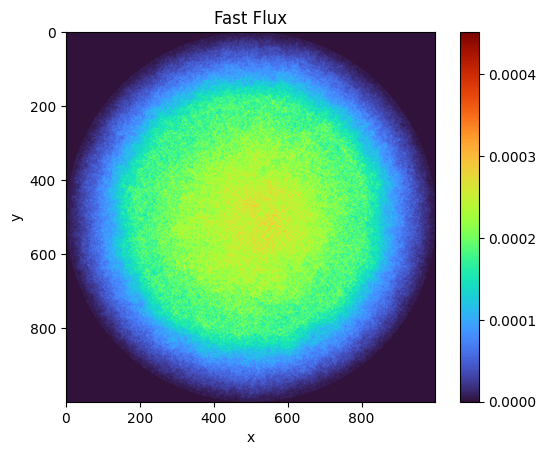

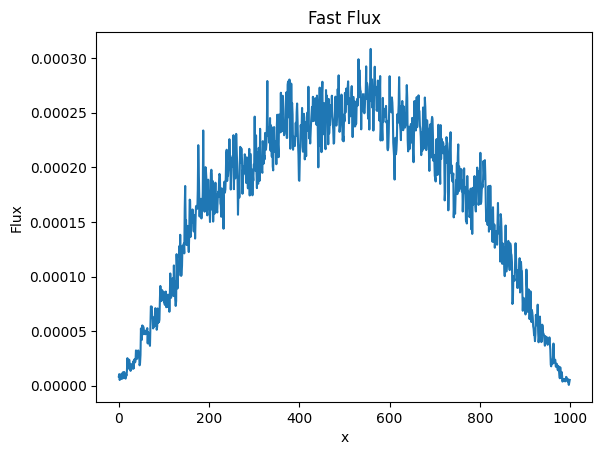

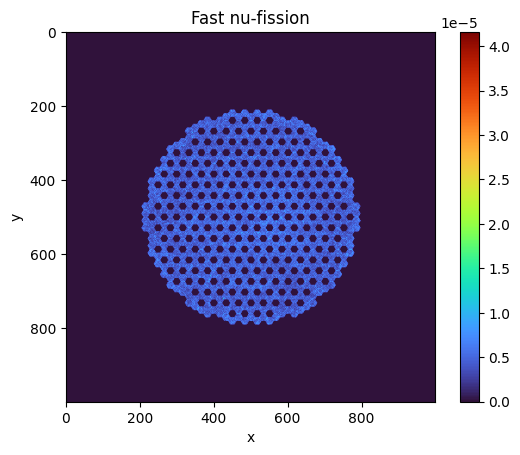

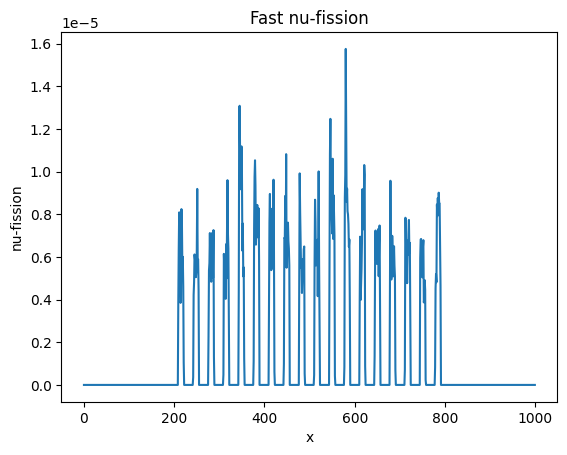

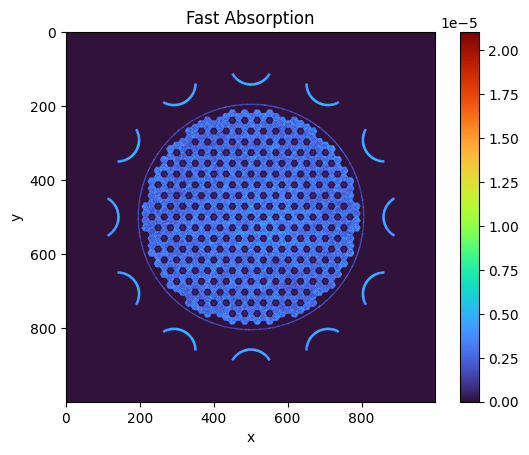

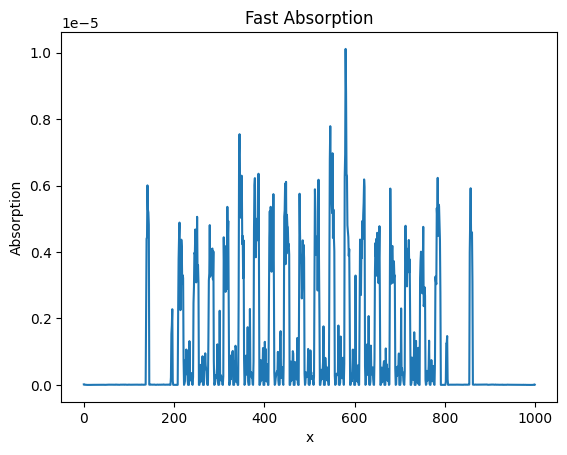

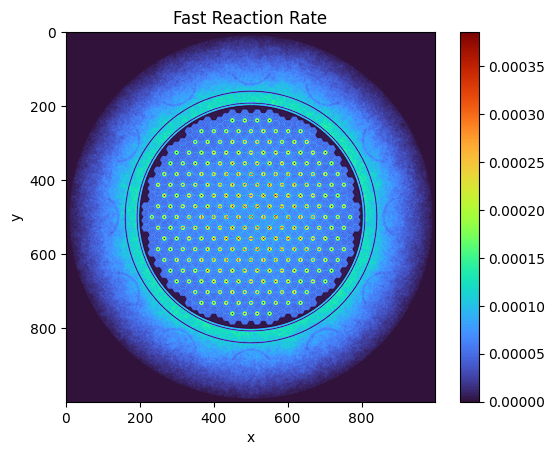

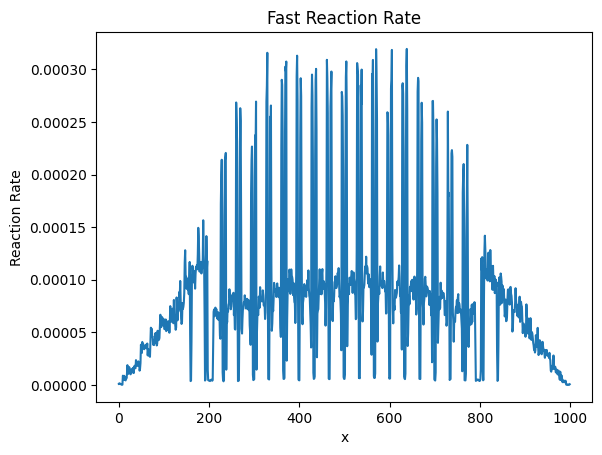

In [10]:
with openmc.StatePoint('statepoint.{}.h5'.format(settings.batches)) as sp:
    outputFastTally = sp.get_tally(id=3)
    dfFast = outputFastTally.get_pandas_dataframe()
    dfFastFlux = dfFast[dfFast['score'] == 'flux']
    dfFastFission = dfFast[dfFast['score'] == 'nu-fission']
    dfFastAbsorption = dfFast[dfFast['score'] == 'absorption']
    # dfFastElastic = dfFast[dfFast['score'] == '(n,elastic)']
    dfFastReactionRate = dfFast[dfFast['score'] == 'total']

# print(outputFastTally)
# print(dfFast)
# print(dfFastFlux)
# print(dfFastFission)
# print(dfFastFlux['mean'])

meanFastFlux = dfFastFlux['mean'].values.reshape((1000,1000))
plt.imshow(meanFastFlux, interpolation='spline16', cmap='turbo')
plt.title('Fast Flux')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.savefig('./pics/Fast/FastFlux.png', dpi=300)
#plt.clim(0.0008,0.0012)
plt.show()

meanFastFluxAx = np.column_stack((np.arange(1000), meanFastFlux[500]))
np.savetxt('./dataFiles/meanFastFluxAx.csv', meanFastFluxAx, delimiter=',', fmt='%s')
meanFastFluxAxData, meanFastFluxAxPos = meanFastFluxAx[:,0], meanFastFluxAx[:,1]
plt.plot(meanFastFluxAxData,meanFastFluxAxPos)
plt.title('Fast Flux')
plt.xlabel('x')
#plt.ylim(bottom=0.0008)
plt.ylabel('Flux')
plt.savefig('./pics/Fast/FastFluxAx.png', dpi=300)
plt.show()

meanFastFission = dfFastFission['mean'].values.reshape((1000,1000))
plt.imshow(meanFastFission, interpolation='spline16', cmap='turbo')
plt.title('Fast nu-fission')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
#plt.clim(6e-6,8e-6)
plt.savefig('./pics/Fast/FastFission.png', dpi=300)
plt.show()

meanFastFissionAx = np.column_stack((np.arange(1000), meanFastFission[500]))
np.savetxt('./dataFiles/meanFastFissionAx.csv', meanFastFissionAx, delimiter=',', fmt='%s')
meanFastFissionAxData, meanFastFissionAxPos = meanFastFissionAx[:,0], meanFastFissionAx[:,1]
plt.plot(meanFastFissionAxData,meanFastFissionAxPos)
plt.title('Fast nu-fission')
plt.xlabel('x')
#plt.ylim(bottom=0.0008)
plt.ylabel('nu-fission')
plt.savefig('./pics/Fast/FastFissionAx.png', dpi=300)
plt.show()

meanFastAbsorption = dfFastAbsorption['mean'].values.reshape((1000,1000))
plt.imshow(meanFastAbsorption, interpolation='spline16', cmap='turbo')
plt.title('Fast Absorption')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
#plt.clim(6e-6,8e-6)
plt.savefig('./pics/Fast/FastAbsorption.png', dpi=300)
plt.show()

meanFastAbsorptionAx = np.column_stack((np.arange(1000), meanFastAbsorption[500]))
np.savetxt('./dataFiles/meanFastAbsorptionAx.csv', meanFastAbsorptionAx, delimiter=',', fmt='%s')
meanFastAbsorptionAxData, meanFastAbsorptionAxPos = meanFastAbsorptionAx[:,0], meanFastAbsorptionAx[:,1]
plt.plot(meanFastAbsorptionAxData,meanFastAbsorptionAxPos)
plt.title('Fast Absorption')
plt.xlabel('x')
#plt.ylim(bottom=0.0008)
plt.ylabel('Absorption')
plt.savefig('./pics/Fast/FastAbsorptionAx.png', dpi=300)
plt.show()

# meanFastElastic = dfFastElastic['mean'].values.reshape((1000,1000))
# plt.imshow(meanFastElastic, interpolation='spline16', cmap='turbo')
# plt.title('Fast Elastic Scattering')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.colorbar()
# #plt.clim(6e-6,8e-6)
# plt.savefig('./pics/Fast/FastElastic.png', dpi=300)
# plt.show()

meanFastReactionRate = dfFastReactionRate['mean'].values.reshape((1000,1000))
plt.imshow(meanFastReactionRate, interpolation='spline16', cmap='turbo')
plt.title('Fast Reaction Rate')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
#plt.clim(6e-6,8e-6)
plt.savefig('./pics/Fast/FastReactionRate.png', dpi=300)
plt.show()

meanFastReactionRateAx = np.column_stack((np.arange(1000), meanFastReactionRate[500]))
np.savetxt('./dataFiles/meanFastReactionRateAx.csv', meanFastReactionRateAx, delimiter=',', fmt='%s')
meanFastReactionRateAxData, meanFastReactionRateAxPos = meanFastReactionRateAx[:,0], meanFastReactionRateAx[:,1]
plt.plot(meanFastReactionRateAxData,meanFastReactionRateAxPos)
plt.title('Fast Reaction Rate')
plt.xlabel('x')
#plt.ylim(bottom=0.0008)
plt.ylabel('Reaction Rate')
plt.savefig('./pics/Fast/FastReactionRateAx.png', dpi=300)
plt.show()